<h1>Table of Contents &lt;br&gt;&lt;/br&gt;<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Imports-and-Data-loading" data-toc-modified-id="Imports-and-Data-loading-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Imports and Data loading</a></span></li></ul></li><li><span><a href="#Demand-Patterns" data-toc-modified-id="Demand-Patterns-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Demand Patterns</a></span><ul class="toc-item"><li><span><a href="#Yearly-rental-patterns" data-toc-modified-id="Yearly-rental-patterns-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Yearly rental patterns</a></span></li><li><span><a href="#Weekly-Pattern-of-connected-EVS" data-toc-modified-id="Weekly-Pattern-of-connected-EVS-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Weekly Pattern of connected EVS</a></span></li><li><span><a href="#Daily-Pattern-of-connected-EVS" data-toc-modified-id="Daily-Pattern-of-connected-EVS-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Daily Pattern of connected EVS</a></span></li><li><span><a href="#2.4.-Average-Daily-Pattern" data-toc-modified-id="2.4.-Average-Daily-Pattern-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>2.4. Average Daily Pattern</a></span></li></ul></li></ul></div>

## Imports and Data loading

In [3]:
# Display plots inline
%matplotlib inline

# Autoreload all package before excecuting a call
%load_ext autoreload
%autoreload 2

In [2]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from evsim.data import load_car2go_trips, load_car2go_capacity

In [58]:
df = pd.read_csv("../logs/stats.csv", parse_dates=[0], infer_datetime_format=True)
df = df.set_index("timestamp")
df

,ev_vpp,vpp_soc,vpp_capacity_kw
timestamp,,,
2016-12-01 01:00:01,0,0.000000,0.0
2016-12-01 01:10:01,0,0.000000,0.0
2016-12-01 01:15:01,0,0.000000,0.0
2016-12-01 01:20:01,0,0.000000,0.0
2016-12-01 01:25:01,1,34.000000,4.6
2016-12-01 01:35:01,0,0.000000,0.0
2016-12-01 01:45:02,0,0.000000,0.0
2016-12-01 01:50:01,1,27.000000,4.6
2016-12-01 01:55:02,1,29.180000,4.6


# Demand Patterns

In [43]:
df.describe()

,ev_vpp,vpp_soc,vpp_capacity_kw
count,41407.000000,41407.000000,41407.000000
mean,18.749294,74.935027,86.246751
std,6.555159,6.126961,30.153732
min,0.000000,0.000000,0.000000
25%,14.000000,70.930000,64.400000
50%,18.000000,74.822500,82.800000
75%,23.000000,78.808038,105.800000
max,59.000000,98.070000,271.400000


In [59]:
def apply_smoother(df, days):
    DAY = 12*24

    df['ev_vpp_avg'] = df['ev_vpp'].rolling(
        window=int(days*DAY)).mean()
    df['vpp_soc_avg'] = df['vpp_soc'].rolling(
        window=int(days*DAY)).mean()
    df['vpp_capacity_kw_avg'] = df['vpp_capacity_kw'].rolling(
        window=int(days*DAY)).mean()

    return df


def plot(df, title, start="2016-12-1", end="2017-04-28"):
    X = df.loc[start:end][['ev_vpp_avg', 'vpp_soc_avg', 'vpp_capacity_kw_avg']]
    return X.plot(figsize=(12, 4), title=title)

## Yearly rental patterns

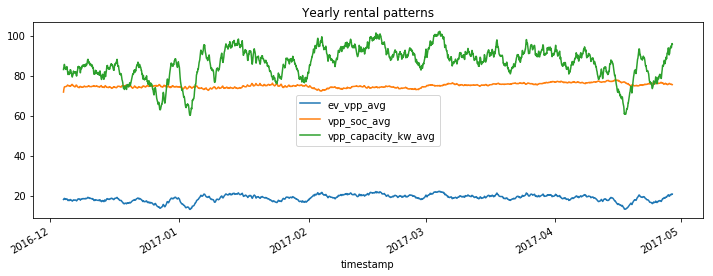

In [60]:
df = apply_smoother(df, days=3)
plot(df, "Yearly rental patterns")

## Weekly Pattern of connected EVS

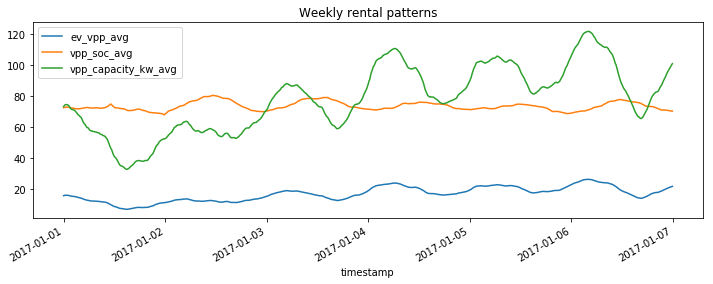

In [61]:
df = apply_smoother(df, days=0.5)
plot(df, "Weekly rental patterns", start=datetime(
    2017, 1, 1), end=datetime(2017, 1, 7))

## Daily Pattern of connected EVS

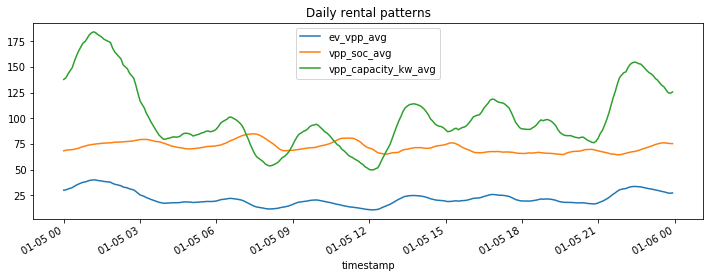

In [62]:
df = apply_smoother(df, days=1/24)
plot(df, "Daily rental patterns", start=datetime(
    2017, 1, 5), end=datetime(2017, 1, 6))

## 2.4. Average Daily Pattern

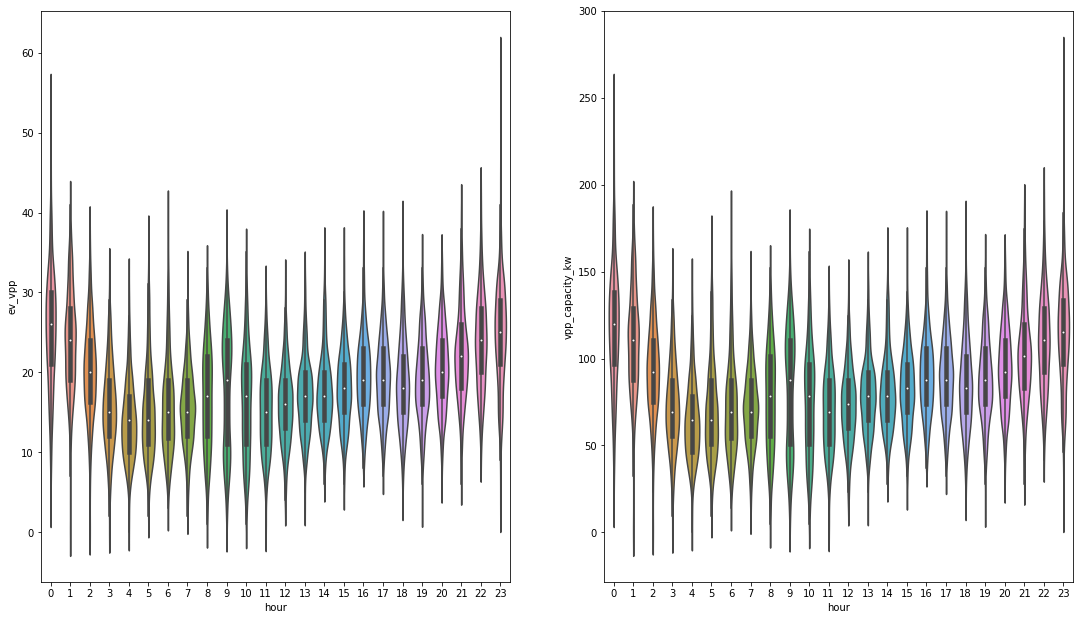

In [70]:
df["hour"] = df.index.hour

f, (ax1, ax2) = plt.subplots(1, 2)
f.set_size_inches(18.5, 10.5)
sns.violinplot(x="hour", y="ev_vpp", data=df, ax=ax1)
sns.violinplot(x="hour", y="vpp_capacity_kw", data=df, ax=ax2)